In [ ]:
pip install requests

In [ ]:
import requests
import pandas as pd

# Your API key from NewsAPI
API_KEY = '52ed958fcf024d669f9bd5e729354405'

# URL for fetching news
url = 'https://newsapi.org/v2/everything'

# Define initial parameters for the API request
parameters = {
    'pageSize': 100,    # Number of articles per page (max is 100)
    'page': 1,          # Page number
    'apiKey': API_KEY
}

# Store news articles
articles_list = []

# Topics to query, 10 topics for 100 articles each to get a total of 1000 articles
queries = ['technology', 'AI', 'economy', 'health', 'sports',
           'environment', 'politics', 'science', 'education', 'business']  # Feel free to modify this list

# Fetch 100 articles for each query topic
for query in queries:
    parameters['q'] = query  # Set the search query
    parameters['page'] = 1   # Reset page to 1 for each query

    # Fetch articles for the current query
    response = requests.get(url, params=parameters)
    data = response.json()

    # Check for errors and add the articles if found
    if 'articles' in data:
        articles_list.extend(data['articles'])
    else:
        print(f"Error for query '{query}':", data.get('message', 'Unknown error'))

# Create a DataFrame from the articles
df_articles = pd.DataFrame(articles_list)

# Filter the necessary columns to store
df_filtered = df_articles[['source', 'author', 'title', 'description', 'url', 'publishedAt', 'content']]

# Save to Excel
df_filtered.to_excel('1000_news_articles.xlsx', index=False)

print("Saved 1000 articles to '1000_news_articles.xlsx'")

Saved 1000 articles to '1000_news_articles.xlsx'


In [ ]:
from transformers import pipeline
import pandas as pd

# Load your dataset
file_path = '/content/1000_news_articles_updated.xlsx'
df = pd.read_excel(file_path)

# Load the Hugging Face paraphrasing model (T5)
paraphrase_model = pipeline("text2text-generation", model="t5-base")

# Function to paraphrase the description
def paraphrase_description(description):
    try:
        # Using the Hugging Face model to paraphrase
        result = paraphrase_model(f"paraphrase: {description}", max_length=100, do_sample=False)
        # Extract the generated paraphrased text from the response
        return result[0]['generated_text']
    except Exception as e:
        print(f"Error: {e}")
        return description  # Return the original description in case of an error

# Apply the paraphrase function to the 'description' column and create a new 'Paraphrased Description' column
df['Paraphrased Description'] = df['description'].apply(lambda x: paraphrase_description(str(x)))

# Save the updated dataset with paraphrased descriptions
output_file_path = '1000_news_articles_with_correct_paraphrased_descriptions.xlsx'
df.to_excel(output_file_path, index=False)

print("Paraphrased descriptions saved successfully.")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Paraphrased descriptions saved successfully.


In [ ]:
from transformers import pipeline

# Load a pre-trained paraphrasing model (switch to a different model)
paraphrase_model = pipeline("text2text-generation", model="ramsrigouthamg/t5_paraphraser")

# Sample description to paraphrase
sample_description = "The company’s new Paper Pro digital notepad features color E Ink technology on a larger, more responsive display."

# Paraphrase function
def paraphrase_sample(text):
    try:
        # Sending text to the model
        response = paraphrase_model(f"paraphrase: {text}", max_length=100, do_sample=False)
        # Extract the generated paraphrased text from the response
        paraphrased_text = response[0].get('generated_text', 'Error: No paraphrase returned')
        return paraphrased_text
    except Exception as e:
        print(f"Error occurred: {e}")
        return text

# Test the paraphrasing
paraphrased_text = paraphrase_sample(sample_description)
print(f"Original: {sample_description}")
print(f"Paraphrased: {paraphrased_text}")


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Original: The company’s new Paper Pro digital notepad features color E Ink technology on a larger, more responsive display.
Paraphrased: Paper Pro is a new digital notepad from Paper.com. It features color E Ink technology on a larger, more responsive display.


In [ ]:
from transformers import pipeline
import pandas as pd

# Load the dataset
file_path = '/content/1000_news_articles_updated.xlsx'
df = pd.read_excel(file_path)

# Load the Hugging Face paraphrasing model
paraphrase_model = pipeline("text2text-generation", model="ramsrigouthamg/t5_paraphraser")

# Function to paraphrase each news description
def paraphrase_description(description):
    try:
        # Ensure the description is not empty or NaN
        if pd.isna(description):
            return description  # Return as is if it's empty

        # Paraphrase the description
        response = paraphrase_model(f"paraphrase: {description}", max_length=100, do_sample=False)
        return response[0]['generated_text']
    except Exception as e:
        print(f"Error occurred: {e}")
        return description  # Return original text in case of error

# Apply paraphrasing to the 'description' column
df['Paraphrased Description'] = df['description'].apply(paraphrase_description)

# Save the updated dataset with paraphrased descriptions
output_file_path = '1000_news_articles_with_paraphrased_descriptions.xlsx'
df.to_excel(output_file_path, index=False)

print("Paraphrased descriptions saved successfully.")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Paraphrased descriptions saved successfully.


1) Data Preprocessing

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/1000_news_articles_with_paraphrased_descriptions.xlsx')

In [ ]:
# Display the first few rows of the dataframe to ensure it was loaded correctly
df.head()

,description,Paraphrased Description
0,The company’s new Paper Pro digital notepad fe...,Paper Pro is a new digital notepad from Paper....
1,"In Hamburg, aviation giant Airbus is transform...","In Hamburg, aviation giant Airbus is transform..."
2,Using quantum technology in space could help s...,How can we discover dark matter in space?
3,Hyundai plans to unveil the Ioniq 9 three-row ...,Hyundai will launch the Ioniq 9 in the next fe...
4,"Hydrogen cars flopped, but some companies are ...","Hydrogen cars flopped, but some companies are ..."


In [ ]:
# Calculate word count for both columns
df['description_word_count'] = df['description'].apply(lambda x: len(str(x).split()))
df['paraphrased_word_count'] = df['Paraphrased Description'].apply(lambda x: len(str(x).split()))

In [ ]:
# Required libraries
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import string

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Handling missing values by replacing them with empty strings
df['description'] = df['description'].fillna('')
df['Paraphrased Description'] = df['Paraphrased Description'].fillna('')

## Collocation Analysis

In [ ]:
# Preprocess text: Tokenization, normalization, stop-word removal, lemmatization
def preprocess_text(text):
    # Tokenize and preprocess with SpaCy
    doc = nlp(text)

    # Convert to lowercase, remove punctuation, and remove stop words
    tokens = [token.lemma_.lower() for token in doc
              if token.text not in string.punctuation
              and token.text.lower() not in stopwords.words('english')]

    return tokens

# Apply preprocessing to both 'description' and 'Paraphrased Description' columns
df['processed_description'] = df['description'].apply(preprocess_text)
df['processed_paraphrased_description'] = df['Paraphrased Description'].apply(preprocess_text)

# Combine the processed texts into one column for analysis
df['combined_text'] = df['processed_description'] + df['processed_paraphrased_description']

# Collocation extraction using BigramAssocMeasures and PMI
def extract_collocations(tokens_list, window_size=2, freq_threshold=5):
    # Flatten the list of token lists for bigram finder
    all_tokens = [token for tokens in tokens_list for token in tokens]

    # Apply BigramCollocationFinder to the tokenized dataset
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(all_tokens, window_size=window_size)

    # Apply frequency filter
    finder.apply_freq_filter(freq_threshold)

    # Score bigrams using Pointwise Mutual Information (PMI)
    scored_bigrams = finder.score_ngrams(bigram_measures.pmi)

    return scored_bigrams

# Extract collocations from the combined text
collocations = extract_collocations(df['combined_text'])

# Sort collocations by PMI scores and display the top results
collocations_sorted = sorted(collocations, key=lambda x: -x[1])

# Display top 10 collocations with highest PMI scores
top_collocations = collocations_sorted[:10]
for bigram, score in top_collocations:
    print(f"Bigram: {bigram}, PMI: {score}")

Bigram: ('gavin', 'newsom'), PMI: 12.470811370761808
Bigram: ('giza', 'pyramid'), PMI: 12.207776964928012
Bigram: ('mood', 'anxious'), PMI: 12.207776964928012
Bigram: ('robert', 'f.'), PMI: 12.207776964928012
Bigram: ('san', 'francisco'), PMI: 12.207776964928012
Bigram: ('myth', 'wukong'), PMI: 11.79273946564917
Bigram: ('running', 'mate'), PMI: 11.79273946564917
Bigram: ('taylor', 'swift'), PMI: 11.79273946564917
Bigram: ('barack', 'obama'), PMI: 11.792739465649168
Bigram: ('sci', 'fi'), PMI: 11.792739465649168


In [ ]:
# Collocation extraction using BigramAssocMeasures and PMI
def extract_collocations(tokens_list, window_size=2, freq_threshold=5):
    # Flatten the list of token lists for bigram finder
    all_tokens = [token for tokens in tokens_list for token in tokens]

    # Apply BigramCollocationFinder to the tokenized dataset
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(all_tokens, window_size=window_size)

    # Apply frequency filter
    finder.apply_freq_filter(freq_threshold)

    # Score bigrams using Pointwise Mutual Information (PMI)
    scored_bigrams = finder.score_ngrams(bigram_measures.pmi)

    return scored_bigrams

# Extract collocations separately for 'description' and 'Paraphrased Description'
description_collocations = extract_collocations(df['processed_description'])
paraphrased_collocations = extract_collocations(df['processed_paraphrased_description'])

# Sort collocations by PMI scores and display the top results for both columns
description_collocations_sorted = sorted(description_collocations, key=lambda x: -x[1])
paraphrased_collocations_sorted = sorted(paraphrased_collocations, key=lambda x: -x[1])

# Display top 10 collocations with highest PMI scores for 'description'
top_description_collocations = description_collocations_sorted[:10]
top_paraphrased_collocations = paraphrased_collocations_sorted[:10]

print("Top 10 Collocations for 'Description':")
for bigram, score in top_description_collocations:
    print(f"Bigram: {bigram}, PMI: {score}")

print("\nTop 10 Collocations for 'Paraphrased Description':")
for bigram, score in top_paraphrased_collocations:
    print(f"Bigram: {bigram}, PMI: {score}")

Top 10 Collocations for 'Description':
Bigram: ('north', 'carolina'), PMI: 11.088409677958794
Bigram: ('account', 'cd'), PMI: 10.310802099295241
Bigram: ('joe', 'biden'), PMI: 10.088409677958794
Bigram: ('saving', 'account'), PMI: 10.088409677958794
Bigram: ('artificial', 'intelligence'), PMI: 10.021295482100257
Bigram: ('tim', 'walz'), PMI: 10.021295482100257
Bigram: ('elon', 'musk'), PMI: 9.98887400440788
Bigram: ('pixel', '9'), PMI: 9.895764600016397
Bigram: ('prime', 'minister'), PMI: 9.51033356282288
Bigram: ('student', 'loan'), PMI: 9.185271217211383

Top 10 Collocations for 'Paraphrased Description':
Bigram: ('north', 'carolina'), PMI: 10.874432523117584
Bigram: ('artificial', 'intelligence'), PMI: 10.319217365790479
Bigram: ('account', 'cd'), PMI: 10.222355826537889
Bigram: ('saving', 'account'), PMI: 10.222355826537889
Bigram: ('elon', 'musk'), PMI: 9.981347727034096
Bigram: ('joe', 'biden'), PMI: 9.981347727034095
Bigram: ('tim', 'walz'), PMI: 9.807318327259043
Bigram: ('pixe

In [ ]:
# Preprocess text: Tokenization, normalization, lemmatization, but do not remove stopwords
def preprocess_text(text):
    # Tokenize and preprocess with SpaCy
    doc = nlp(text)

    # Convert to lowercase and remove punctuation, but keep stopwords
    tokens = [token.lemma_.lower() for token in doc
              if token.text not in string.punctuation]

    return tokens

# Apply preprocessing to both 'description' and 'Paraphrased Description' columns
df['processed_description'] = df['description'].apply(preprocess_text)
df['processed_paraphrased_description'] = df['Paraphrased Description'].apply(preprocess_text)

# Collocation extraction using BigramAssocMeasures and PMI
def extract_collocations(tokens_list, window_size=2, freq_threshold=5):
    # Flatten the list of token lists for bigram finder
    all_tokens = [token for tokens in tokens_list for token in tokens]

    # Apply BigramCollocationFinder to the tokenized dataset
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(all_tokens, window_size=window_size)

    # Apply frequency filter
    finder.apply_freq_filter(freq_threshold)

    # Score bigrams using Pointwise Mutual Information (PMI)
    scored_bigrams = finder.score_ngrams(bigram_measures.pmi)

    return scored_bigrams

# Extract collocations separately for 'description' and 'Paraphrased Description'
description_collocations = extract_collocations(df['processed_description'])
paraphrased_collocations = extract_collocations(df['processed_paraphrased_description'])

# Sort collocations by PMI scores and display the top results for both columns
description_collocations_sorted = sorted(description_collocations, key=lambda x: -x[1])
paraphrased_collocations_sorted = sorted(paraphrased_collocations, key=lambda x: -x[1])

# Display top 10 collocations with highest PMI scores for 'description'
top_description_collocations = description_collocations_sorted[:10]
top_paraphrased_collocations = paraphrased_collocations_sorted[:10]

print("Top 10 Collocations for 'Description':")
for bigram, score in top_description_collocations:
    print(f"Bigram: {bigram}, PMI: {score}")

print("\nTop 10 Collocations for 'Paraphrased Description':")
for bigram, score in top_paraphrased_collocations:
    print(f"Bigram: {bigram}, PMI: {score}")

Top 10 Collocations for 'Description':
Bigram: ('north', 'carolina'), PMI: 11.734104741997662
Bigram: ('joe', 'biden'), PMI: 10.734104741997662
Bigram: ('saving', 'account'), PMI: 10.734104741997662
Bigram: ('artificial', 'intelligence'), PMI: 10.666990546139125
Bigram: ('tim', 'walz'), PMI: 10.666990546139125
Bigram: ('elon', 'musk'), PMI: 10.634569068446748
Bigram: ('pixel', '9'), PMI: 10.541459664055266
Bigram: ('prime', 'minister'), PMI: 10.156028626861747
Bigram: ('student', 'loan'), PMI: 9.830966281250252
Bigram: ('datum', 'center'), PMI: 9.808105323441438

Top 10 Collocations for 'Paraphrased Description':
Bigram: ('north', 'carolina'), PMI: 11.548065003595575
Bigram: ('artificial', 'intelligence'), PMI: 10.99284984626847
Bigram: ('saving', 'account'), PMI: 10.89598830701588
Bigram: ('elon', 'musk'), PMI: 10.654980207512088
Bigram: ('joe', 'biden'), PMI: 10.654980207512086
Bigram: ('tim', 'walz'), PMI: 10.480950807737038
Bigram: ('pixel', '9'), PMI: 10.355419925653178
Bigram: ('

In [ ]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
# Collocation extraction using TrigramAssocMeasures and PMI for trigrams
def extract_trigrams(tokens_list, window_size=3, freq_threshold=5):
    # Flatten the list of token lists for trigram finder
    all_tokens = [token for tokens in tokens_list for token in tokens]

    # Apply TrigramCollocationFinder to the tokenized dataset
    trigram_measures = TrigramAssocMeasures()
    finder = TrigramCollocationFinder.from_words(all_tokens, window_size=window_size)

    # Apply frequency filter
    finder.apply_freq_filter(freq_threshold)

    # Score trigrams using Pointwise Mutual Information (PMI)
    scored_trigrams = finder.score_ngrams(trigram_measures.pmi)

    return scored_trigrams

# Extract trigrams separately for 'description' and 'Paraphrased Description'
description_trigrams = extract_trigrams(df['processed_description'])
paraphrased_trigrams = extract_trigrams(df['processed_paraphrased_description'])

# Sort trigrams by PMI scores and display the top results for both columns
description_trigrams_sorted = sorted(description_trigrams, key=lambda x: -x[1])
paraphrased_trigrams_sorted = sorted(paraphrased_trigrams, key=lambda x: -x[1])

# Display top 10 trigrams with highest PMI scores for 'description'
top_description_trigrams = description_trigrams_sorted[:10]
top_paraphrased_trigrams = paraphrased_trigrams_sorted[:10]

print("Top 10 Trigrams for 'Description':")
for trigram, score in top_description_trigrams:
    print(f"Trigram: {trigram}, PMI: {score}")

print("\nTop 10 Trigrams for 'Paraphrased Description':")
for trigram, score in top_paraphrased_trigrams:
    print(f"Trigram: {trigram}, PMI: {score}")

Top 10 Trigrams for 'Description':
Trigram: ('former', 'prime', 'minister'), PMI: 19.23805667227972
Trigram: ('apple', 'vision', 'pro'), PMI: 18.733085236653288
Trigram: ('vice', 'president', 'kamala'), PMI: 17.865688611889865
Trigram: ('tell', 'business', 'insider'), PMI: 16.47183687949982
Trigram: ('president', 'kamala', 'harris'), PMI: 15.991219493973723
Trigram: ('…', 'read', 'more'), PMI: 15.44159006636485
Trigram: ('appear', 'first', 'on'), PMI: 14.674430358267227
Trigram: ('business', 'insider', "'s"), PMI: 13.294643877593465
Trigram: ('kamala', 'harris', 'have'), PMI: 13.139470452557667
Trigram: ('business', 'insider', 'that'), PMI: 12.87960637831462

Top 10 Trigrams for 'Paraphrased Description':
Trigram: ('former', 'prime', 'minister'), PMI: 19.29298733642046
Trigram: ('growth', 'growth', 'growth'), PMI: 18.85744821032667
Trigram: ('apple', 'vision', 'pro'), PMI: 18.518547036835592
Trigram: ('...', 'read', 'more'), PMI: 15.509696119253324
Trigram: ('be', 'there', 'any'), PMI:

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Stopwords list from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Updated collocation extraction function with stopword removal
def extract_collocations(tokens_list, window_size=2, freq_threshold=5):
    # Flatten the list of token lists and remove stopwords
    all_tokens = [token for tokens in tokens_list for token in remove_stopwords(tokens)]

    # Bigram association measures (PMI and T-Score)
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(all_tokens, window_size=window_size)

    # Apply frequency filter
    finder.apply_freq_filter(freq_threshold)

    # Extract and score collocations using Pointwise Mutual Information (PMI)
    scored_pmi = finder.score_ngrams(bigram_measures.pmi)

    # Extract and score collocations using T-Scores
    scored_t_score = finder.score_ngrams(bigram_measures.student_t)

    # Frequency distribution of collocations
    frequency = finder.ngram_fd.items()

    return scored_pmi, scored_t_score, frequency

# Extract collocations separately for 'description' (human-written) and 'Paraphrased Description' (AI-generated)
pmi_description, t_score_description, freq_description = extract_collocations(df['processed_description'])
pmi_paraphrased, t_score_paraphrased, freq_paraphrased = extract_collocations(df['processed_paraphrased_description'])

# Sort collocations by PMI scores, T-scores, and frequency for both columns
pmi_description_sorted = sorted(pmi_description, key=lambda x: -x[1])
t_score_description_sorted = sorted(t_score_description, key=lambda x: -x[1])
freq_description_sorted = sorted(freq_description, key=lambda x: -x[1])

pmi_paraphrased_sorted = sorted(pmi_paraphrased, key=lambda x: -x[1])
t_score_paraphrased_sorted = sorted(t_score_paraphrased, key=lambda x: -x[1])
freq_paraphrased_sorted = sorted(freq_paraphrased, key=lambda x: -x[1])

# Display top 10 results for PMI, T-Scores, and Frequency Analysis
print("Top 10 Collocations for 'Description' by PMI:")
for bigram, score in pmi_description_sorted[:10]:
    print(f"Bigram: {bigram}, PMI: {score}")

print("\nTop 10 Collocations for 'Description' by T-Score:")
for bigram, score in t_score_description_sorted[:10]:
    print(f"Bigram: {bigram}, T-Score: {score}")

print("\nTop 10 Collocations for 'Description' by Frequency:")
for bigram, freq in freq_description_sorted[:10]:
    print(f"Bigram: {bigram}, Frequency: {freq}")

print("\nTop 10 Collocations for 'Paraphrased Description' by PMI:")
for bigram, score in pmi_paraphrased_sorted[:10]:
    print(f"Bigram: {bigram}, PMI: {score}")

print("\nTop 10 Collocations for 'Paraphrased Description' by T-Score:")
for bigram, score in t_score_paraphrased_sorted[:10]:
    print(f"Bigram: {bigram}, T-Score: {score}")

print("\nTop 10 Collocations for 'Paraphrased Description' by Frequency:")
for bigram, freq in freq_paraphrased_sorted[:10]:
    print(f"Bigram: {bigram}, Frequency: {freq}")


Top 10 Collocations for 'Description' by PMI:
Bigram: ('north', 'carolina'), PMI: 11.074045866221912
Bigram: ('account', 'cd'), PMI: 10.296438287558363
Bigram: ('joe', 'biden'), PMI: 10.074045866221915
Bigram: ('saving', 'account'), PMI: 10.074045866221915
Bigram: ('artificial', 'intelligence'), PMI: 10.006931670363379
Bigram: ('tim', 'walz'), PMI: 10.006931670363375
Bigram: ('elon', 'musk'), PMI: 9.974510192671001
Bigram: ('pixel', '9'), PMI: 9.88140078827952
Bigram: ('prime', 'minister'), PMI: 9.495969751085998
Bigram: ('student', 'loan'), PMI: 9.170907405474505

Top 10 Collocations for 'Description' by T-Score:
Bigram: ('kamala', 'harris'), T-Score: 5.551530738022884
Bigram: ('business', 'insider'), T-Score: 4.969849579219402
Bigram: ('donald', 'trump'), T-Score: 4.4597487518374965
Bigram: ('labor', 'day'), T-Score: 3.8618964148870165
Bigram: ('elon', 'musk'), T-Score: 3.601967465966146
Bigram: ('student', 'loan'), T-Score: 3.310870680804118
Bigram: ('vice', 'president'), T-Score: 3

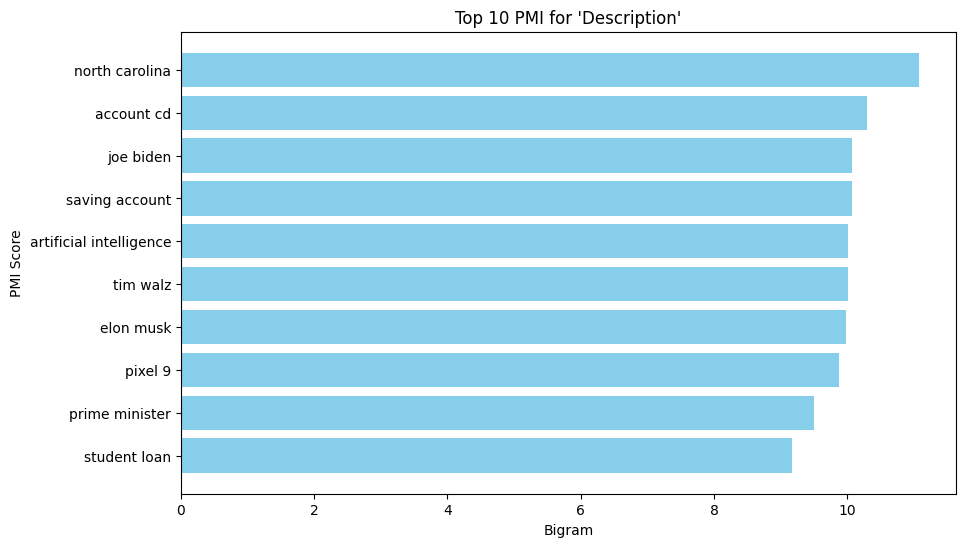

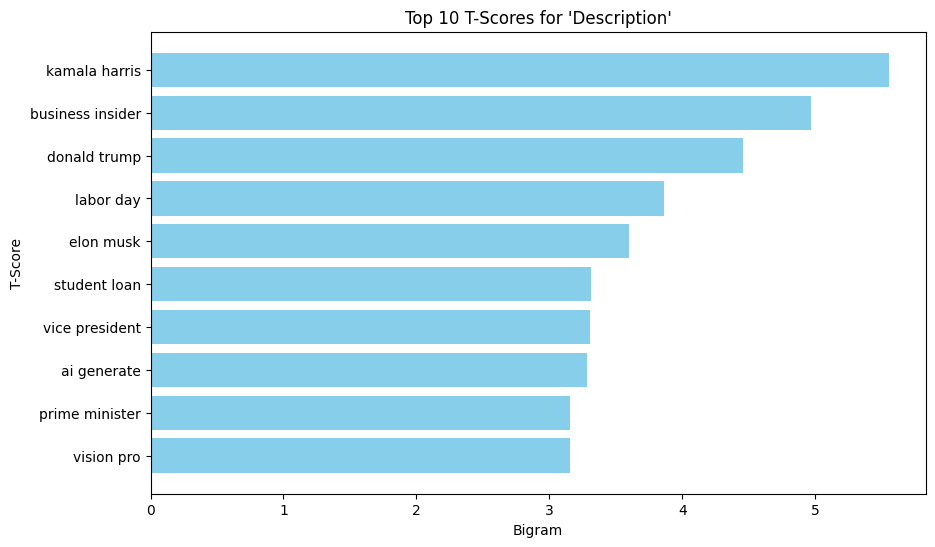

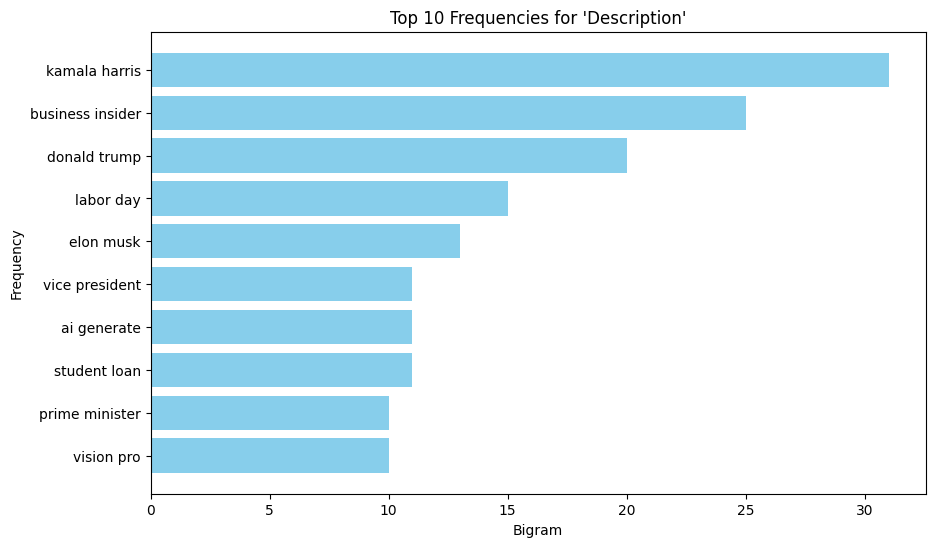

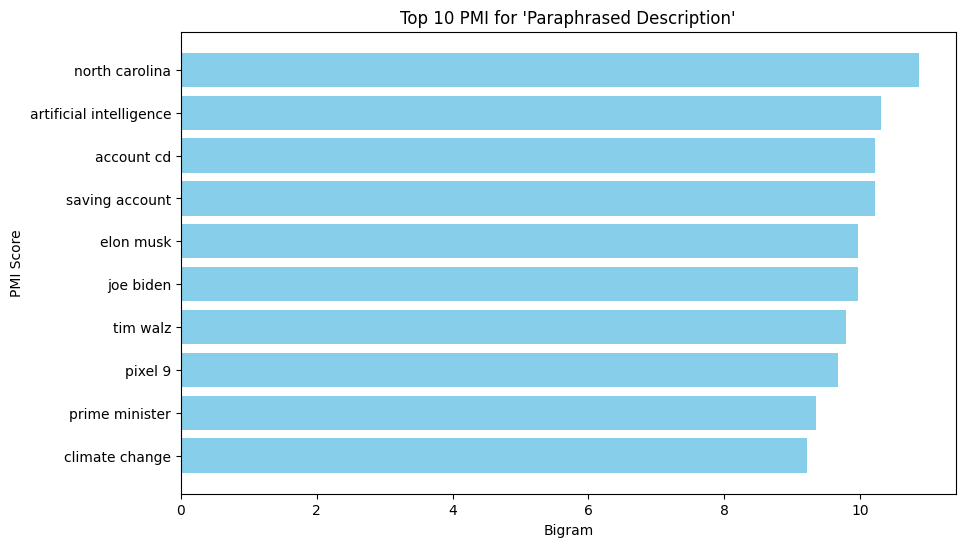

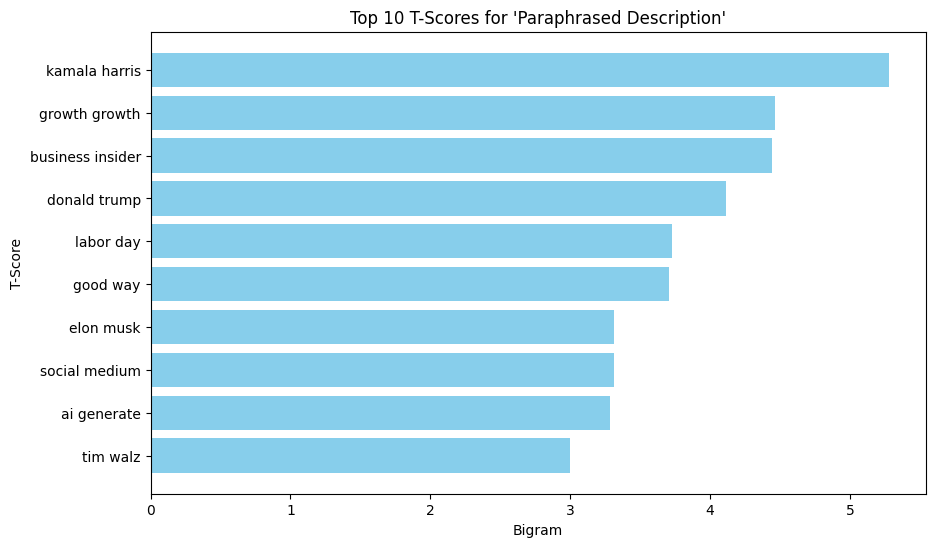

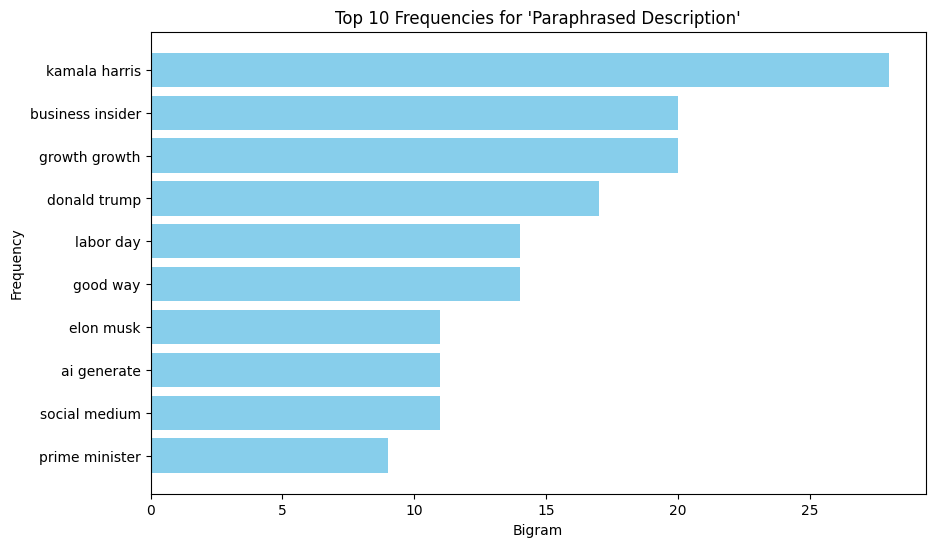

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'df' contains the processed tokenized data in the columns 'processed_description' and 'processed_paraphrased_description'

# Extract collocations using the actual dataset for 'description' and 'paraphrased_description'
# Remove stopwords from the tokenized data in 'df'

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Updated collocation extraction function with stopword removal
def extract_collocations(tokens_list, window_size=2, freq_threshold=5):
    # Flatten the list of token lists and remove stopwords
    all_tokens = [token for tokens in tokens_list for token in remove_stopwords(tokens)]

    # Bigram association measures (PMI and T-Score)
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(all_tokens, window_size=window_size)

    # Apply frequency filter
    finder.apply_freq_filter(freq_threshold)

    # Extract and score collocations using Pointwise Mutual Information (PMI)
    scored_pmi = finder.score_ngrams(bigram_measures.pmi)

    # Extract and score collocations using T-Scores
    scored_t_score = finder.score_ngrams(bigram_measures.student_t)

    # Frequency distribution of collocations
    frequency = finder.ngram_fd.items()

    return scored_pmi, scored_t_score, frequency

# Extract collocations for the actual dataset (assuming df has processed tokens)
pmi_description, t_score_description, freq_description = extract_collocations(df['processed_description'])
pmi_paraphrased, t_score_paraphrased, freq_paraphrased = extract_collocations(df['processed_paraphrased_description'])

# Sorting collocations by PMI scores, T-scores, and frequency for both columns
pmi_description_sorted = sorted(pmi_description, key=lambda x: -x[1])
t_score_description_sorted = sorted(t_score_description, key=lambda x: -x[1])
freq_description_sorted = sorted(freq_description, key=lambda x: -x[1])

pmi_paraphrased_sorted = sorted(pmi_paraphrased, key=lambda x: -x[1])
t_score_paraphrased_sorted = sorted(t_score_paraphrased, key=lambda x: -x[1])
freq_paraphrased_sorted = sorted(freq_paraphrased, key=lambda x: -x[1])

# Visualization function for collocations
def plot_collocations(collocations, title, ylabel, xlabel="Bigram", top_n=10):
    bigrams, scores = zip(*collocations[:top_n])  # Get top N bigrams and their scores
    bigram_labels = [" ".join(bigram) for bigram in bigrams]  # Convert bigrams to string format

    plt.figure(figsize=(10, 6))
    plt.barh(bigram_labels, scores, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Visualizing for human-written ('description')
plot_collocations(pmi_description_sorted, title="Top 10 PMI for 'Description'", ylabel="PMI Score")
plot_collocations(t_score_description_sorted, title="Top 10 T-Scores for 'Description'", ylabel="T-Score")
plot_collocations(freq_description_sorted, title="Top 10 Frequencies for 'Description'", ylabel="Frequency")

# Visualizing for AI-generated ('Paraphrased Description')
plot_collocations(pmi_paraphrased_sorted, title="Top 10 PMI for 'Paraphrased Description'", ylabel="PMI Score")
plot_collocations(t_score_paraphrased_sorted, title="Top 10 T-Scores for 'Paraphrased Description'", ylabel="T-Score")
plot_collocations(freq_paraphrased_sorted, title="Top 10 Frequencies for 'Paraphrased Description'", ylabel="Frequency")


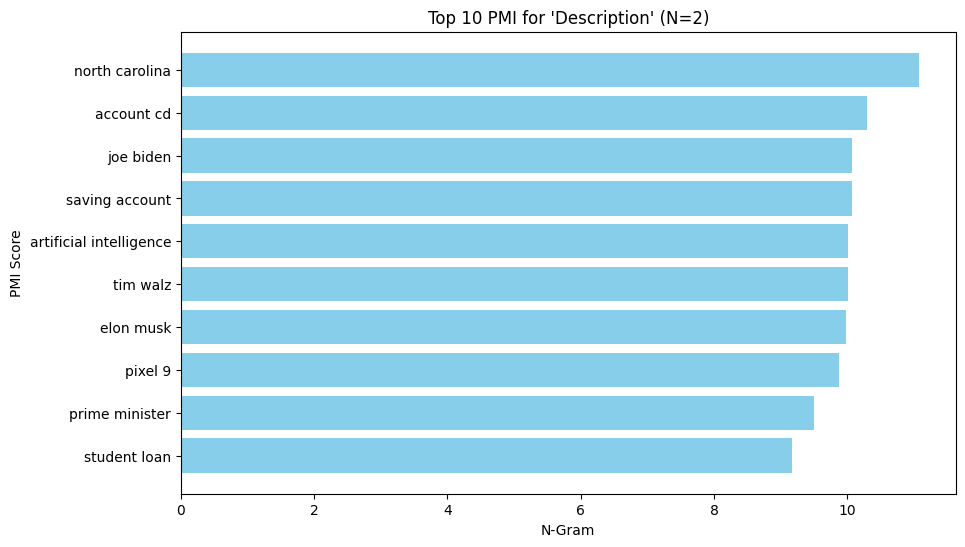

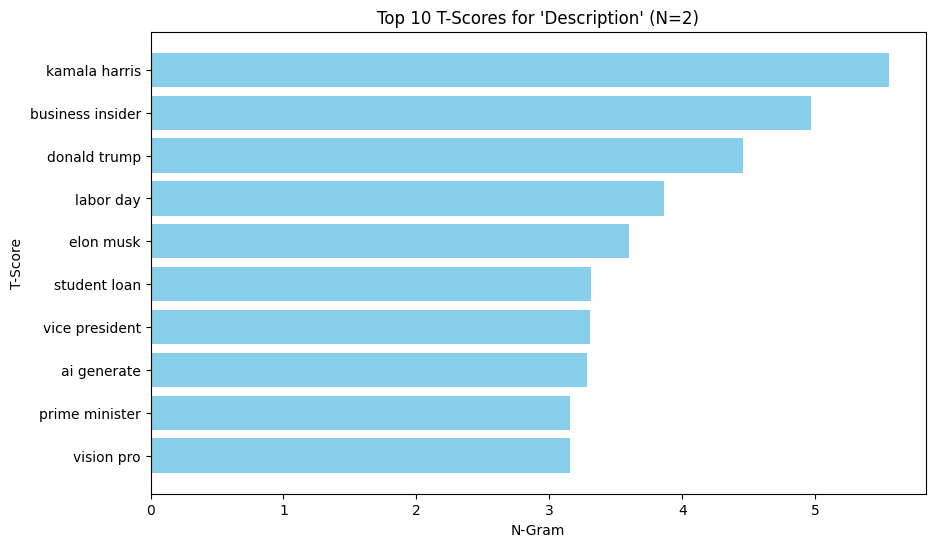

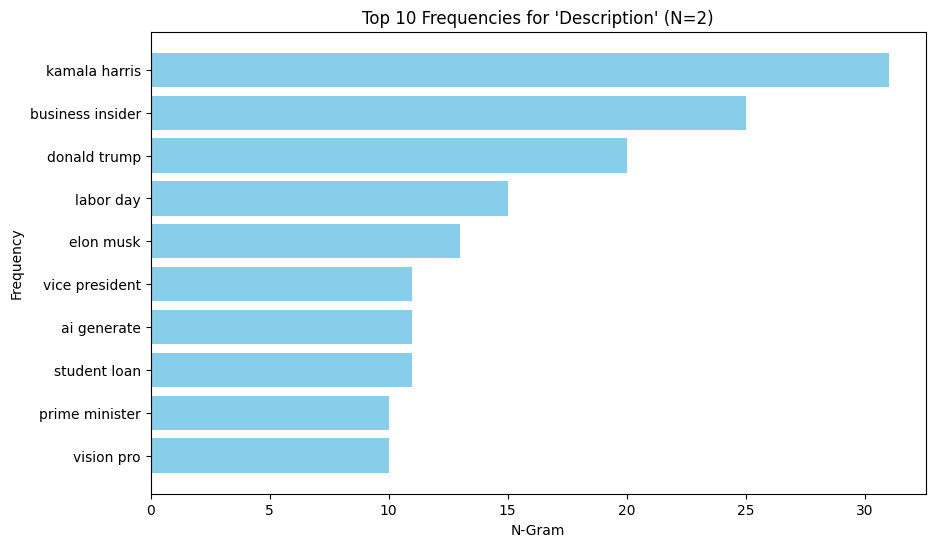

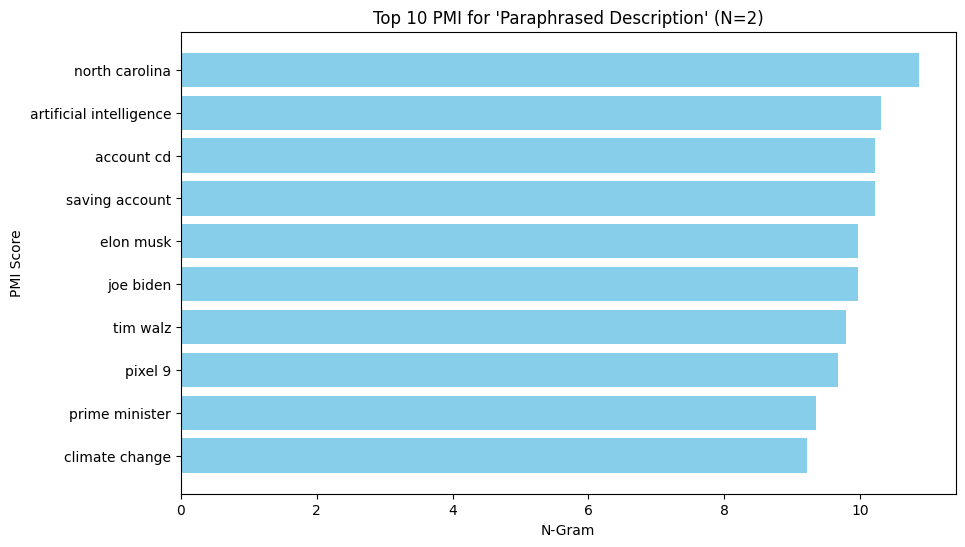

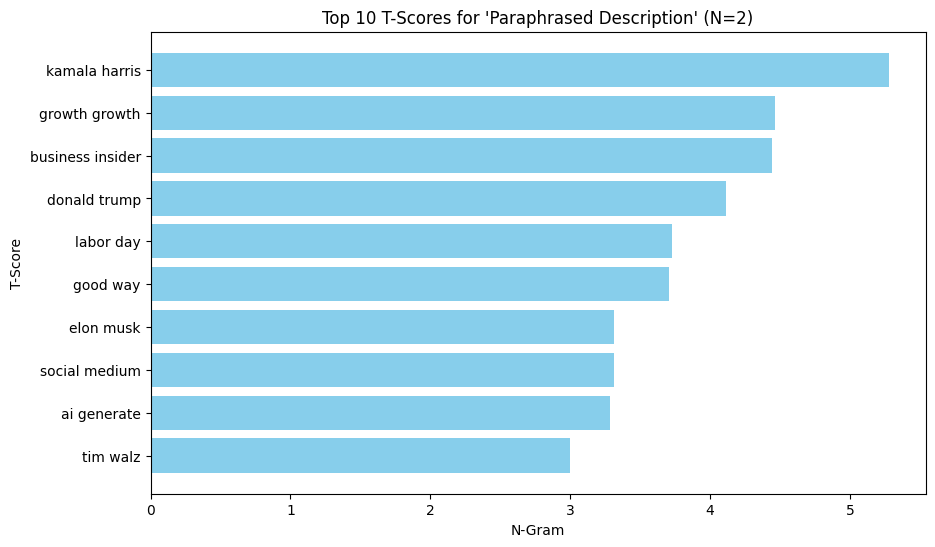

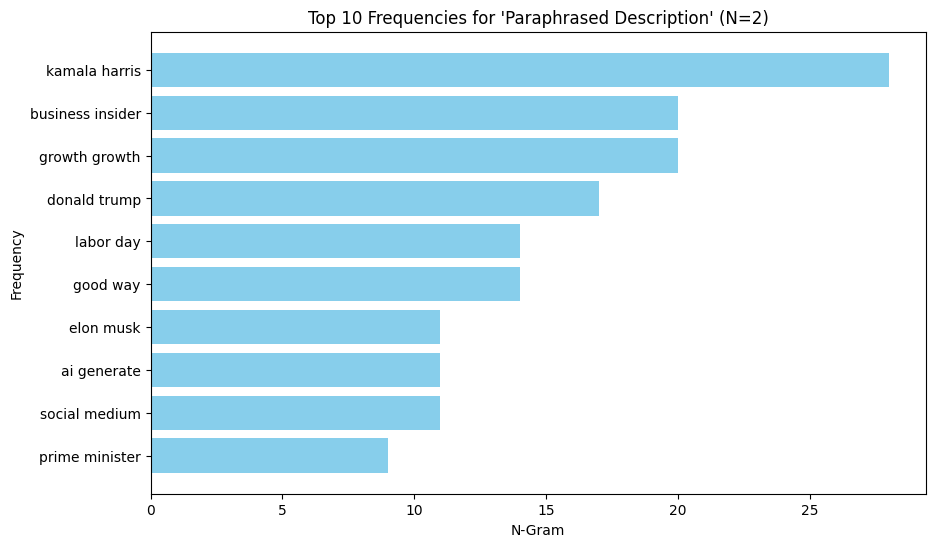

In [ ]:
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder, BigramAssocMeasures
import matplotlib.pyplot as plt

# Function to remove stopwords from tokens
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

# Updated function to extract N-gram collocations (Supports Bigrams or Trigrams) with stopword removal
def extract_ngrams(tokens_list, n=2, freq_threshold=5):
    # Flatten the list of token lists and remove stopwords
    all_tokens = [token for tokens in tokens_list for token in remove_stopwords(tokens)]

    if n == 2:  # Bigrams
        collocation_finder = BigramCollocationFinder.from_words(all_tokens)
        measures = BigramAssocMeasures()
    elif n == 3:  # Trigrams
        collocation_finder = TrigramCollocationFinder.from_words(all_tokens)
        measures = BigramAssocMeasures()  # TrigramAssocMeasures can also be used if needed

    collocation_finder.apply_freq_filter(freq_threshold)

    # PMI and T-Score
    scored_pmi = collocation_finder.score_ngrams(measures.pmi)
    scored_t_score = collocation_finder.score_ngrams(measures.student_t)
    frequency = collocation_finder.ngram_fd.items()  # Frequency of N-grams

    return scored_pmi, scored_t_score, frequency

# Extract bigrams or trigrams (change n=2 for bigrams or n=3 for trigrams)
n_value = 2  # Set to 2 for bigrams or 3 for trigrams
pmi_description, t_score_description, freq_description = extract_ngrams(df['processed_description'], n=n_value)
pmi_paraphrased, t_score_paraphrased, freq_paraphrased = extract_ngrams(df['processed_paraphrased_description'], n=n_value)

# Sorting collocations by PMI scores, T-scores, and frequency for both columns
pmi_description_sorted = sorted(pmi_description, key=lambda x: -x[1])
t_score_description_sorted = sorted(t_score_description, key=lambda x: -x[1])
freq_description_sorted = sorted(freq_description, key=lambda x: -x[1])

pmi_paraphrased_sorted = sorted(pmi_paraphrased, key=lambda x: -x[1])
t_score_paraphrased_sorted = sorted(t_score_paraphrased, key=lambda x: -x[1])
freq_paraphrased_sorted = sorted(freq_paraphrased, key=lambda x: -x[1])

# Visualization Function for N-Grams
def plot_collocations(collocations, title, ylabel, xlabel="N-Gram", top_n=10):
    ngrams, scores = zip(*collocations[:top_n])  # Get top N n-grams and their scores
    ngram_labels = [" ".join(ngram) for ngram in ngrams]  # Convert n-grams to string format

    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, scores, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Visualizing for human-written ('description')
plot_collocations(pmi_description_sorted, title=f"Top 10 PMI for 'Description' (N={n_value})", ylabel="PMI Score")
plot_collocations(t_score_description_sorted, title=f"Top 10 T-Scores for 'Description' (N={n_value})", ylabel="T-Score")
plot_collocations(freq_description_sorted, title=f"Top 10 Frequencies for 'Description' (N={n_value})", ylabel="Frequency")

# Visualizing for AI-generated ('Paraphrased Description')
plot_collocations(pmi_paraphrased_sorted, title=f"Top 10 PMI for 'Paraphrased Description' (N={n_value})", ylabel="PMI Score")
plot_collocations(t_score_paraphrased_sorted, title=f"Top 10 T-Scores for 'Paraphrased Description' (N={n_value})", ylabel="T-Score")
plot_collocations(freq_paraphrased_sorted, title=f"Top 10 Frequencies for 'Paraphrased Description' (N={n_value})", ylabel="Frequency")


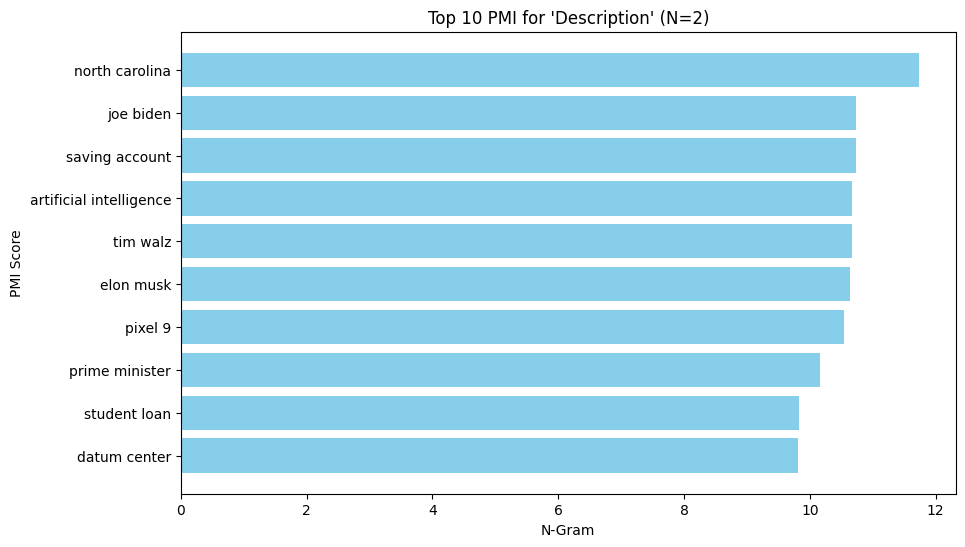

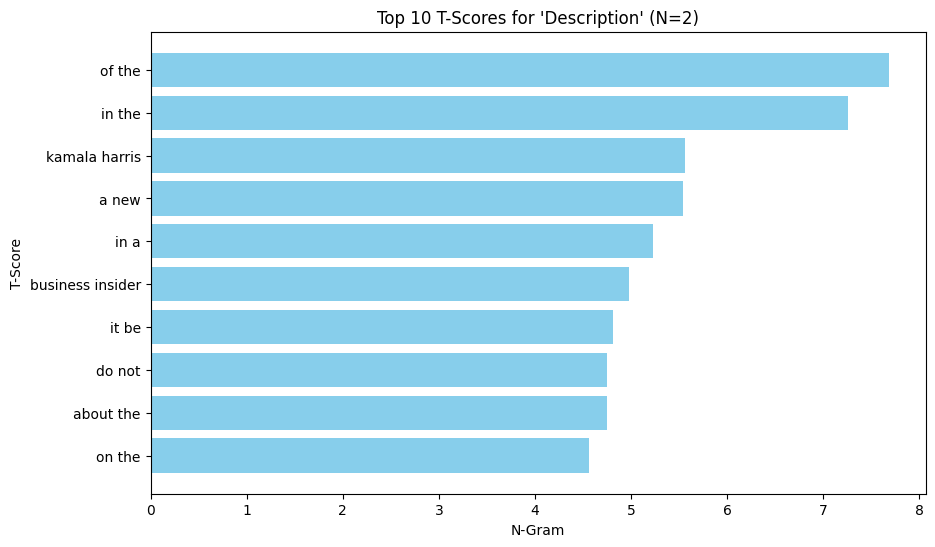

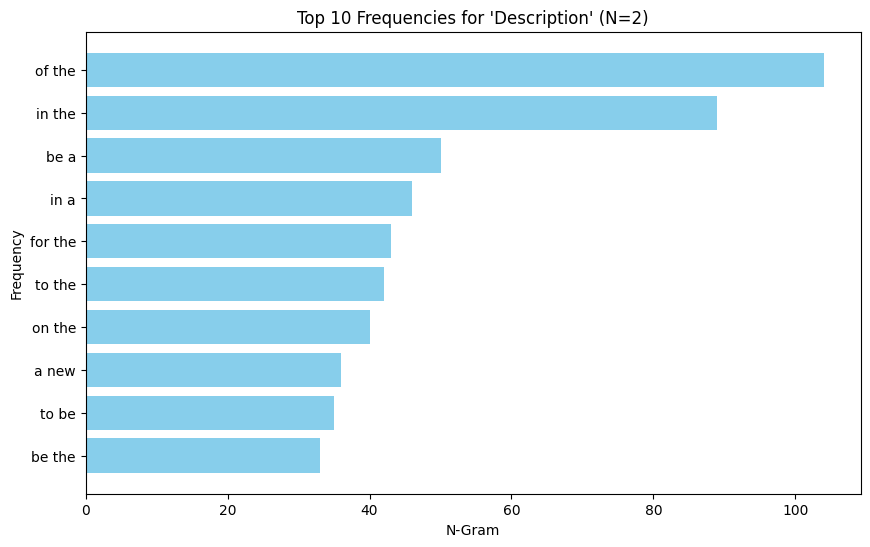

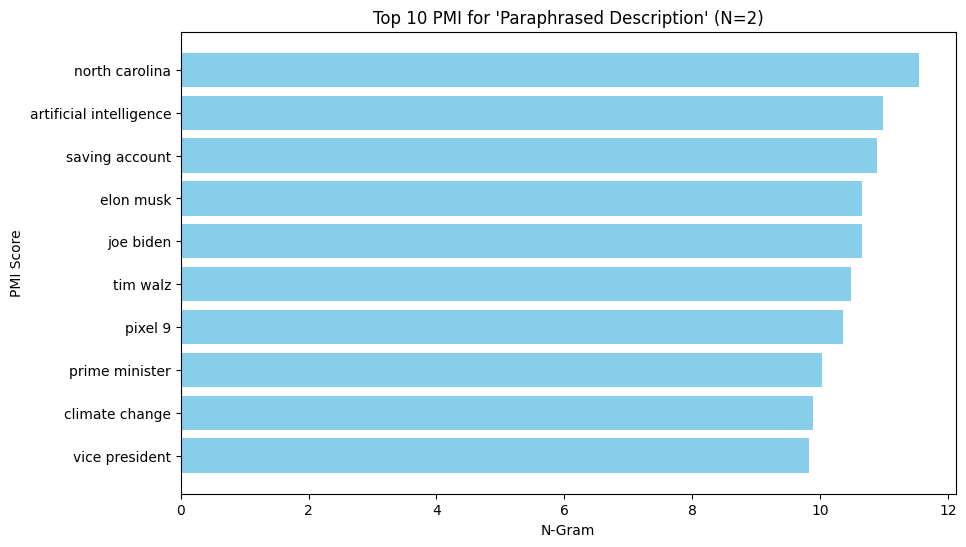

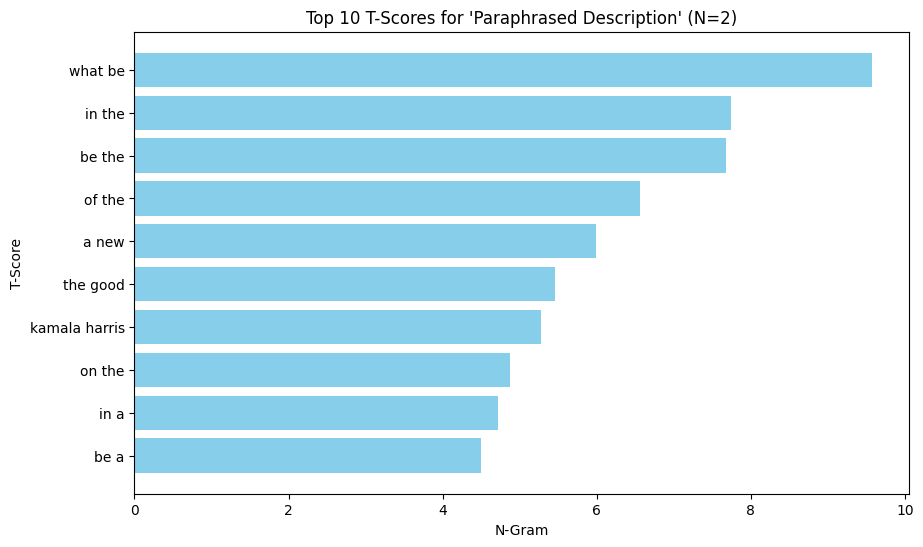

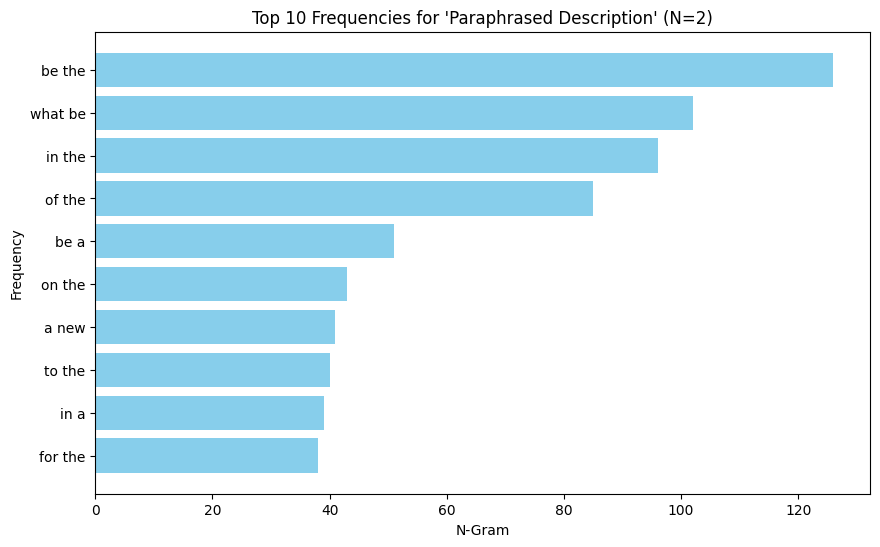

In [ ]:
# Function to extract N-gram collocations (Supports Bigrams or Trigrams)
def extract_ngrams(tokens_list, n=2, freq_threshold=5):
    all_tokens = [token for tokens in tokens_list for token in tokens]  # Flatten list of token lists

    if n == 2:  # Bigrams
        collocation_finder = BigramCollocationFinder.from_words(all_tokens)
        measures = BigramAssocMeasures()
    elif n == 3:  # Trigrams
        collocation_finder = TrigramCollocationFinder.from_words(all_tokens)
        measures = BigramAssocMeasures()  # TrigramAssocMeasures can also be used if needed

    collocation_finder.apply_freq_filter(freq_threshold)

    # PMI and T-Score
    scored_pmi = collocation_finder.score_ngrams(measures.pmi)
    scored_t_score = collocation_finder.score_ngrams(measures.student_t)
    frequency = collocation_finder.ngram_fd.items()  # Frequency of N-grams

    return scored_pmi, scored_t_score, frequency

# Extract bigrams or trigrams (change n=2 for bigrams or n=3 for trigrams)
n_value = 2  # Set to 2 for bigrams or 3 for trigrams
pmi_description, t_score_description, freq_description = extract_ngrams(df['processed_description'], n=n_value)
pmi_paraphrased, t_score_paraphrased, freq_paraphrased = extract_ngrams(df['processed_paraphrased_description'], n=n_value)

# Sort collocations by PMI scores, T-scores, and frequency for both columns
pmi_description_sorted = sorted(pmi_description, key=lambda x: -x[1])
t_score_description_sorted = sorted(t_score_description, key=lambda x: -x[1])
freq_description_sorted = sorted(freq_description, key=lambda x: -x[1])

pmi_paraphrased_sorted = sorted(pmi_paraphrased, key=lambda x: -x[1])
t_score_paraphrased_sorted = sorted(t_score_paraphrased, key=lambda x: -x[1])
freq_paraphrased_sorted = sorted(freq_paraphrased, key=lambda x: -x[1])

# Visualization Function for N-Grams
def plot_collocations(collocations, title, ylabel, xlabel="N-Gram", top_n=10):
    ngrams, scores = zip(*collocations[:top_n])  # Get top N n-grams and their scores
    ngram_labels = [" ".join(ngram) for ngram in ngrams]  # Convert n-grams to string format

    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, scores, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Visualizing for human-written ('description')
plot_collocations(pmi_description_sorted, title=f"Top 10 PMI for 'Description' (N={n_value})", ylabel="PMI Score")
plot_collocations(t_score_description_sorted, title=f"Top 10 T-Scores for 'Description' (N={n_value})", ylabel="T-Score")
plot_collocations(freq_description_sorted, title=f"Top 10 Frequencies for 'Description' (N={n_value})", ylabel="Frequency")

# Visualizing for AI-generated ('Paraphrased Description')
plot_collocations(pmi_paraphrased_sorted, title=f"Top 10 PMI for 'Paraphrased Description' (N={n_value})", ylabel="PMI Score")
plot_collocations(t_score_paraphrased_sorted, title=f"Top 10 T-Scores for 'Paraphrased Description' (N={n_value})", ylabel="T-Score")
plot_collocations(freq_paraphrased_sorted, title=f"Top 10 Frequencies for 'Paraphrased Description' (N={n_value})", ylabel="Frequency")

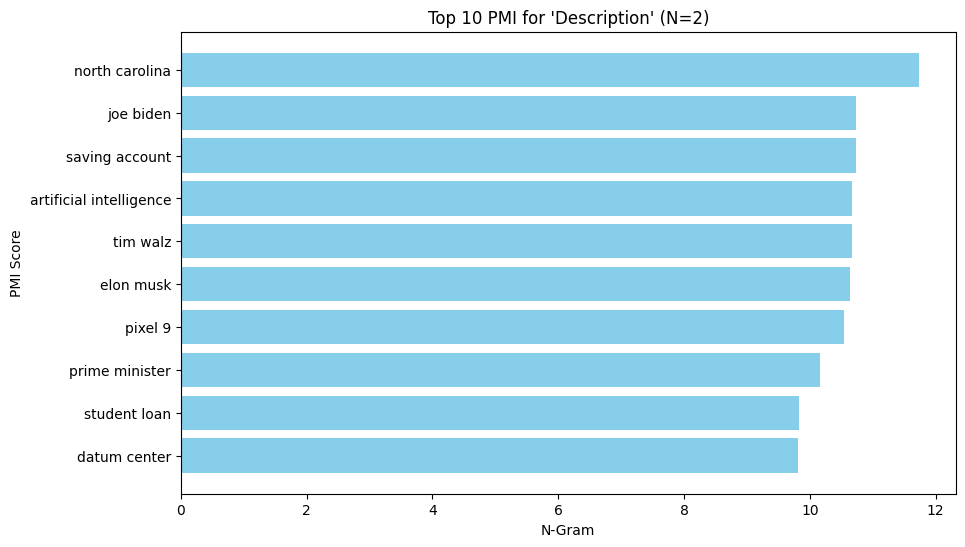

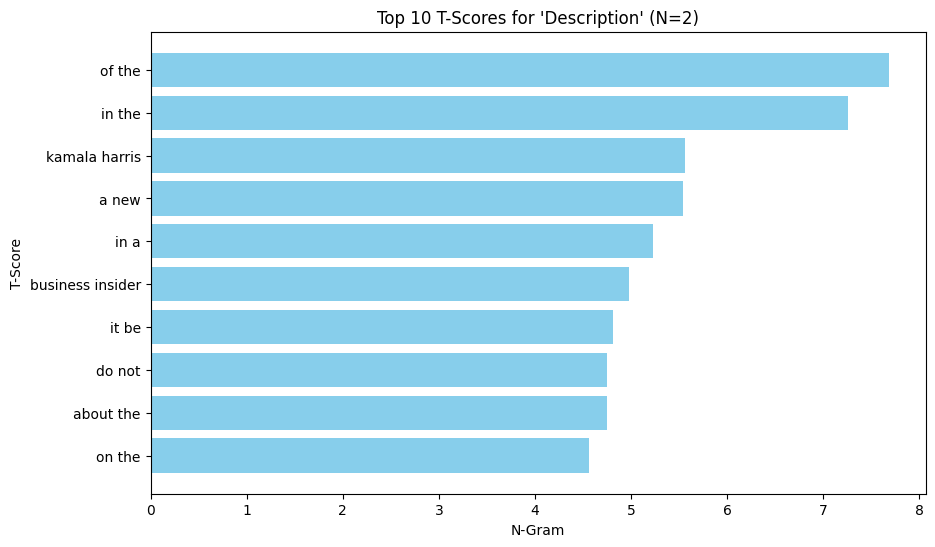

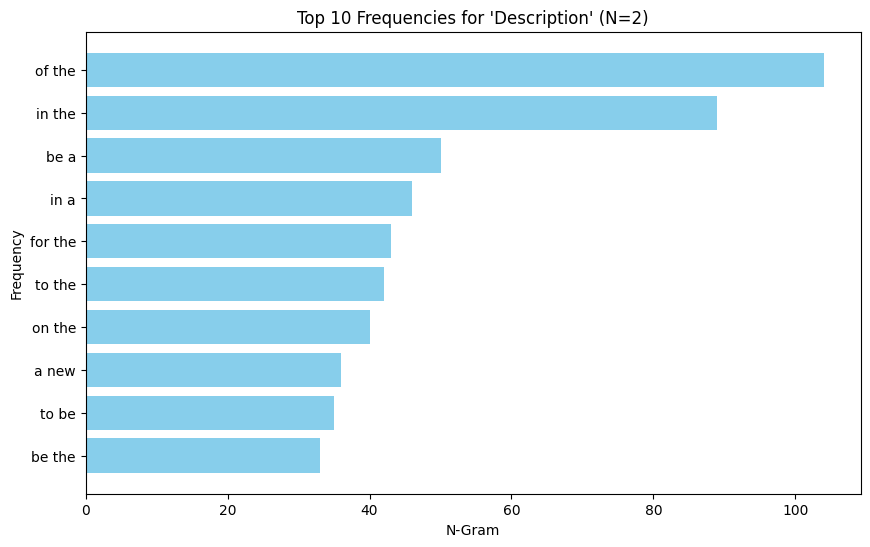

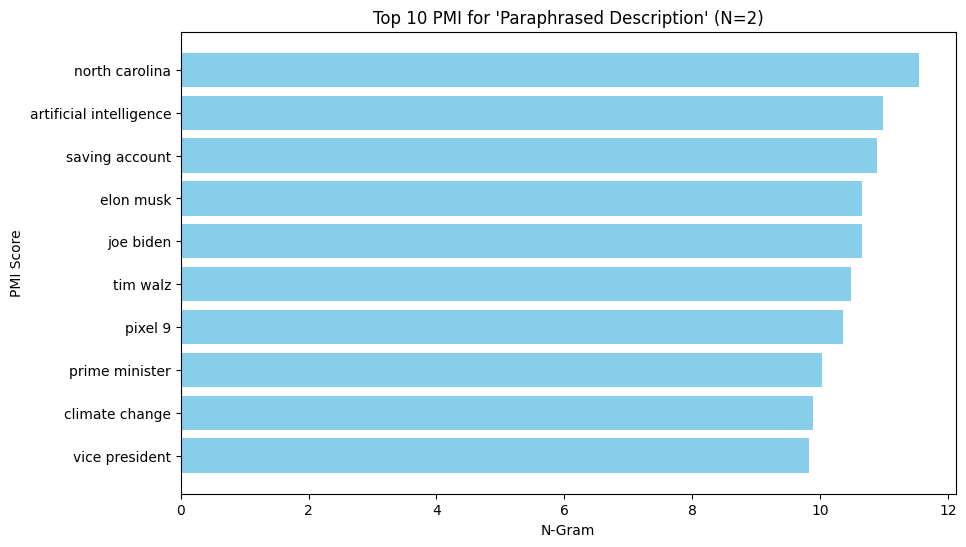

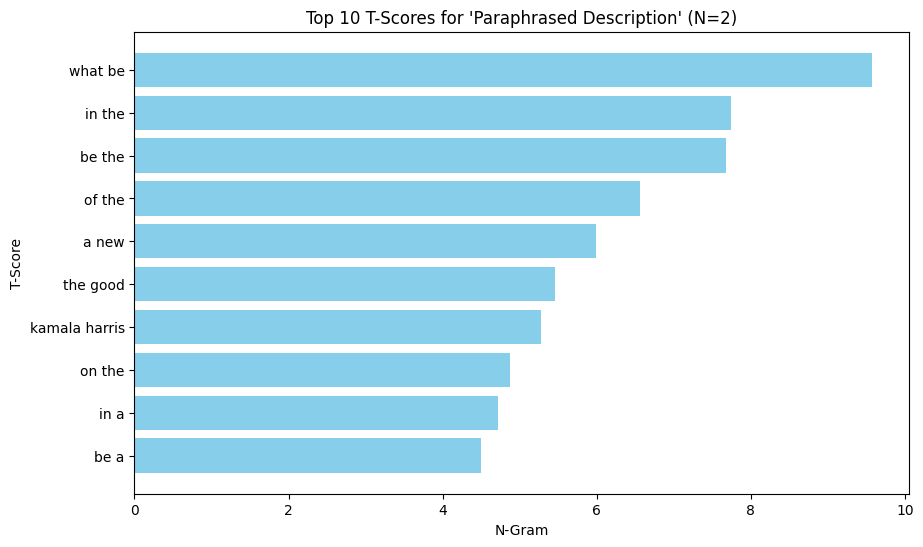

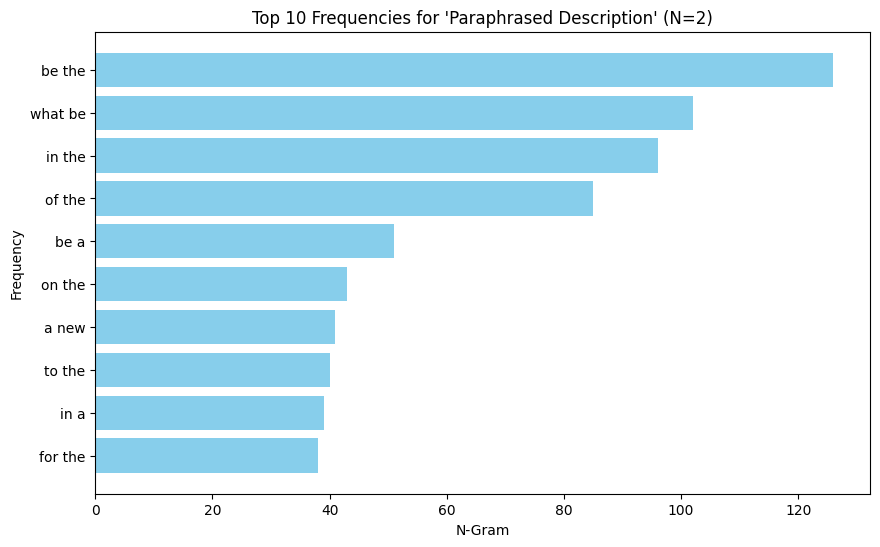

In [ ]:
# Function to extract N-gram collocations (Supports Bigrams, Trigrams, or Higher)
def extract_ngrams(tokens_list, n=2, freq_threshold=5):
    all_tokens = [token for tokens in tokens_list for token in tokens]  # Flatten list of token lists

    if n == 2:  # Bigrams
        collocation_finder = BigramCollocationFinder.from_words(all_tokens)
        measures = BigramAssocMeasures()
    elif n == 3:  # Trigrams
        collocation_finder = TrigramCollocationFinder.from_words(all_tokens)
        measures = TrigramAssocMeasures()
    else:
        # Custom N-grams for N > 3
        from nltk.util import ngrams
        all_ngrams = list(ngrams(all_tokens, n))
        collocation_finder = defaultdict(int)
        for ngram_tuple in all_ngrams:
            collocation_finder[ngram_tuple] += 1
        collocation_finder = dict(collocation_finder)
        return sorted(collocation_finder.items(), key=lambda x: -x[1])

    collocation_finder.apply_freq_filter(freq_threshold)  # Apply frequency filter

    # PMI and T-Score
    scored_pmi = collocation_finder.score_ngrams(measures.pmi)
    scored_t_score = collocation_finder.score_ngrams(measures.student_t)
    frequency = collocation_finder.ngram_fd.items()  # Frequency of N-grams

    return scored_pmi, scored_t_score, frequency

# Extract bigrams or trigrams (change n=2 for bigrams or n=3 for trigrams or n>3 for higher n-grams)
n_value = 2  # Set to 2 for bigrams, 3 for trigrams, or more for higher N-grams
pmi_description, t_score_description, freq_description = extract_ngrams(df['processed_description'], n=n_value)
pmi_paraphrased, t_score_paraphrased, freq_paraphrased = extract_ngrams(df['processed_paraphrased_description'], n=n_value)

# Sort collocations by PMI scores, T-scores, and frequency for both columns
pmi_description_sorted = sorted(pmi_description, key=lambda x: -x[1])
t_score_description_sorted = sorted(t_score_description, key=lambda x: -x[1])
freq_description_sorted = sorted(freq_description, key=lambda x: -x[1])

pmi_paraphrased_sorted = sorted(pmi_paraphrased, key=lambda x: -x[1])
t_score_paraphrased_sorted = sorted(t_score_paraphrased, key=lambda x: -x[1])
freq_paraphrased_sorted = sorted(freq_paraphrased, key=lambda x: -x[1])

# Visualization Function for N-Grams
def plot_collocations(collocations, title, ylabel, xlabel="N-Gram", top_n=10):
    ngrams, scores = zip(*collocations[:top_n])  # Get top N n-grams and their scores
    ngram_labels = [" ".join(ngram) for ngram in ngrams]  # Convert n-grams to string format

    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, scores, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Visualizing for human-written ('description')
plot_collocations(pmi_description_sorted, title=f"Top 10 PMI for 'Description' (N={n_value})", ylabel="PMI Score")
plot_collocations(t_score_description_sorted, title=f"Top 10 T-Scores for 'Description' (N={n_value})", ylabel="T-Score")
plot_collocations(freq_description_sorted, title=f"Top 10 Frequencies for 'Description' (N={n_value})", ylabel="Frequency")

# Visualizing for AI-generated ('Paraphrased Description')
plot_collocations(pmi_paraphrased_sorted, title=f"Top 10 PMI for 'Paraphrased Description' (N={n_value})", ylabel="PMI Score")
plot_collocations(t_score_paraphrased_sorted, title=f"Top 10 T-Scores for 'Paraphrased Description' (N={n_value})", ylabel="T-Score")
plot_collocations(freq_paraphrased_sorted, title=f"Top 10 Frequencies for 'Paraphrased Description' (N={n_value})", ylabel="Frequency")

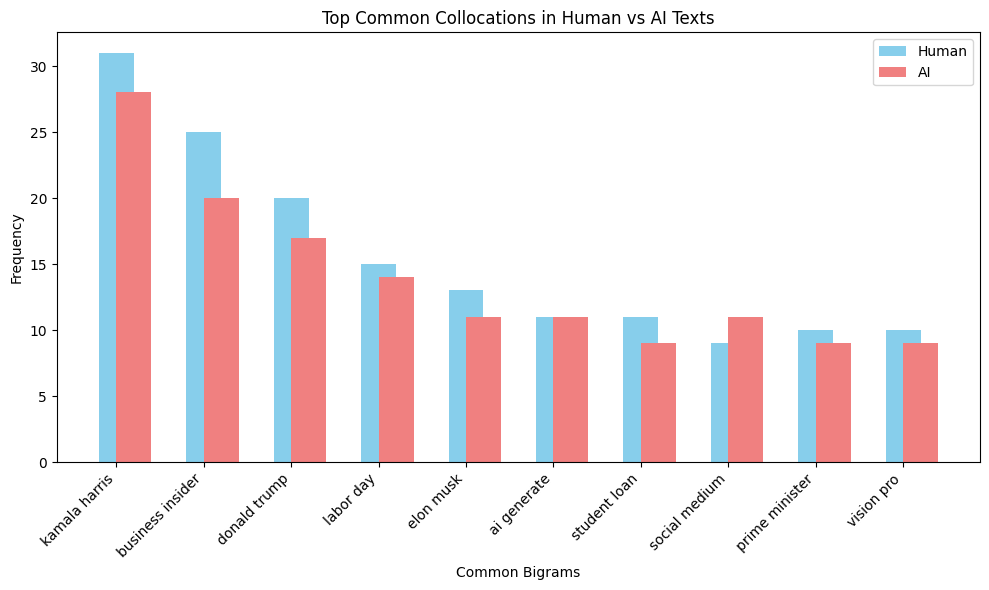

Human Texts - Total Collocations: 15090, Unique: 13108, Avg Occurrence: 1.15
AI Texts - Total Collocations: 13033, Unique: 11363, Avg Occurrence: 1.15
Human-written texts exhibit more variety in collocations.


In [ ]:
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
import matplotlib.pyplot as plt
import spacy

# Load spacy model
nlp = spacy.load('en_core_web_sm')

# Function to remove stopwords, normalize, and tokenize text
def preprocess_text_remove_stopwords(text):
    # Tokenize and preprocess with SpaCy
    doc = nlp(text)

    # Load stopwords
    stop_words = set(stopwords.words('english'))

    # Convert to lowercase, remove punctuation and stopwords
    tokens = [token.lemma_.lower() for token in doc
              if token.text not in string.punctuation and token.lemma_.lower() not in stop_words]

    return tokens

# Apply preprocessing to both 'description' and 'Paraphrased Description' columns
df['processed_description'] = df['description'].apply(preprocess_text_remove_stopwords)
df['processed_paraphrased_description'] = df['Paraphrased Description'].apply(preprocess_text_remove_stopwords)

# Function to extract bigrams and their frequency counts
def extract_bigram_frequencies(tokens_list, freq_threshold=1):
    all_tokens = [token for tokens in tokens_list for token in tokens]  # Flatten list of token lists
    bigram_finder = BigramCollocationFinder.from_words(all_tokens)
    bigram_finder.apply_freq_filter(freq_threshold)  # Apply a frequency filter (if needed)

    bigram_freq = bigram_finder.ngram_fd.items()  # Get the frequency distribution of bigrams
    return sorted(bigram_freq, key=lambda x: -x[1])  # Return sorted by frequency in descending order

# Extract bigram frequencies for both human-written and AI-generated texts
freq_description = extract_bigram_frequencies(df['processed_description'])
freq_paraphrased = extract_bigram_frequencies(df['processed_paraphrased_description'])

# Convert the frequency results into Counter objects for easy comparison
freq_description_counter = Counter(dict(freq_description))
freq_paraphrased_counter = Counter(dict(freq_paraphrased))

# Function to find common collocations between the two datasets and compare their prevalence
def compare_collocations(freq_human, freq_ai):
    # Find common collocations
    common_collocations = set(freq_human.keys()).intersection(set(freq_ai.keys()))

    comparison_data = []

    for collocation in common_collocations:
        human_count = freq_human[collocation]
        ai_count = freq_ai[collocation]
        comparison_data.append((collocation, human_count, ai_count))

    return sorted(comparison_data, key=lambda x: -(x[1] + x[2]))  # Sort by total occurrence

# Compare collocations between human-written and AI-generated texts
collocation_comparison = compare_collocations(freq_description_counter, freq_paraphrased_counter)

# Function to plot common collocations in both datasets
def plot_collocation_comparison(comparison_data, top_n=10):
    common_bigrams = [" ".join(bigram) for bigram, _, _ in comparison_data[:top_n]]
    human_counts = [human_count for _, human_count, _ in comparison_data[:top_n]]
    ai_counts = [ai_count for _, _, ai_count in comparison_data[:top_n]]

    x = range(len(common_bigrams))

    plt.figure(figsize=(10, 6))
    plt.bar(x, human_counts, width=0.4, label='Human', align='center', color='skyblue')
    plt.bar(x, ai_counts, width=0.4, label='AI', align='edge', color='lightcoral')

    plt.xlabel("Common Bigrams")
    plt.ylabel("Frequency")
    plt.title("Top Common Collocations in Human vs AI Texts")
    plt.xticks(x, common_bigrams, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the top 10 common collocations
plot_collocation_comparison(collocation_comparison, top_n=10)

# Analyze whether AI-generated texts exhibit more predictable and repetitive collocations
def analyze_repetitiveness(freq_human, freq_ai):
    total_human = sum(freq_human.values())
    total_ai = sum(freq_ai.values())

    unique_human = len(freq_human)
    unique_ai = len(freq_ai)

    avg_human = total_human / unique_human
    avg_ai = total_ai / unique_ai

    print(f"Human Texts - Total Collocations: {total_human}, Unique: {unique_human}, Avg Occurrence: {avg_human:.2f}")
    print(f"AI Texts - Total Collocations: {total_ai}, Unique: {unique_ai}, Avg Occurrence: {avg_ai:.2f}")

    # Assess whether AI shows more predictability or repetitiveness
    if avg_ai > avg_human:
        print("AI-generated texts exhibit more predictable and repetitive collocations.")
    else:
        print("Human-written texts exhibit more variety in collocations.")

# Perform the repetitiveness analysis
analyze_repetitiveness(freq_description_counter, freq_paraphrased_counter)


Unique Collocations in Human Texts: 3002
Unique Collocations in AI Texts: 1257


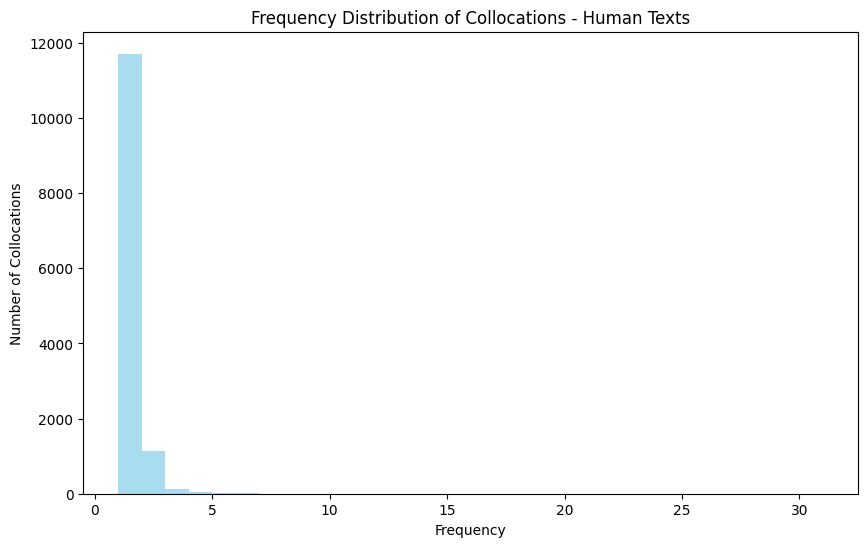

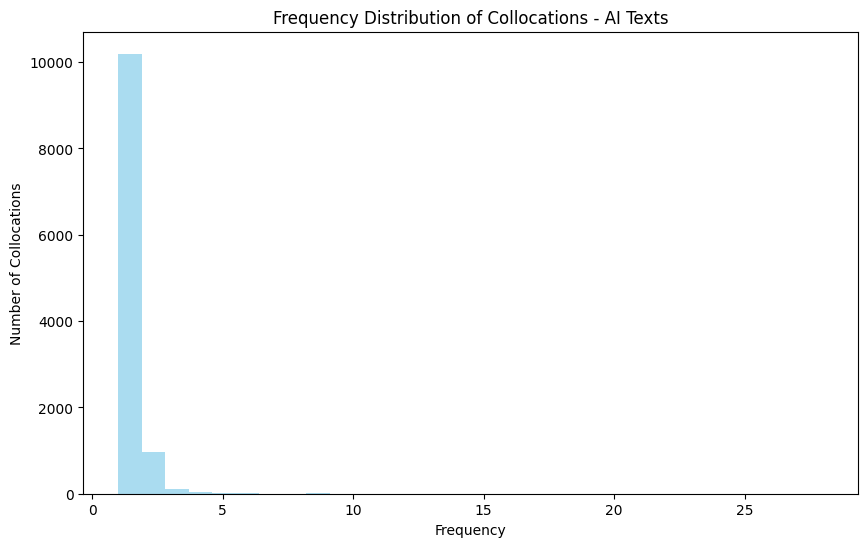

Lexical Diversity in Human Texts: 0.8687
Lexical Diversity in AI Texts: 0.8719


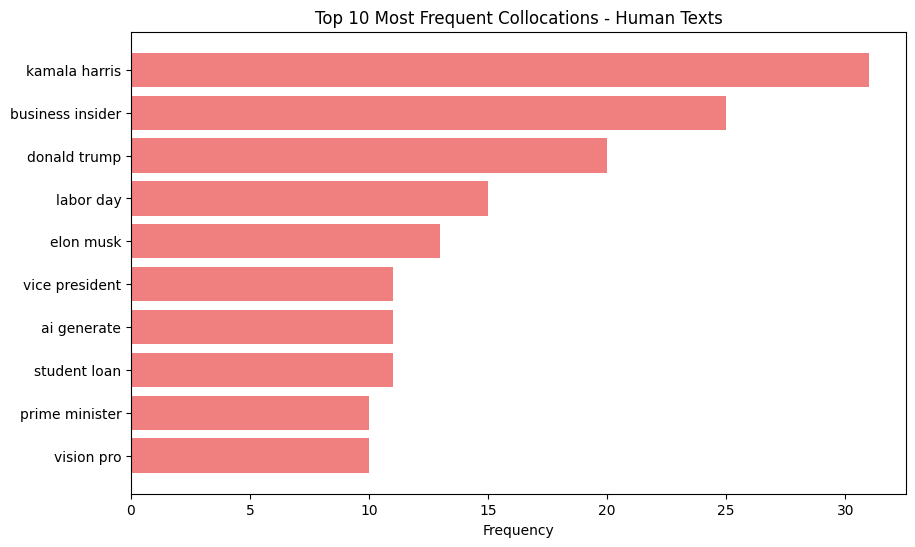

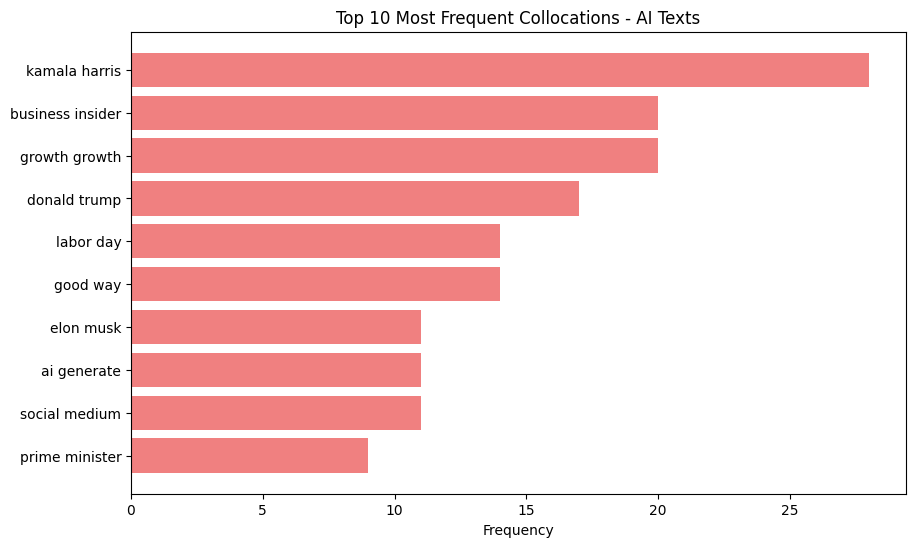

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Preprocess text: Tokenization, normalization, lemmatization, and remove stopwords
def preprocess_text(text):
    # Tokenize and preprocess with SpaCy
    doc = nlp(text)

    # Convert to lowercase, remove punctuation, and remove stopwords
    tokens = [token.lemma_.lower() for token in doc if token.text not in string.punctuation]
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

# Apply preprocessing to both columns
df['processed_description'] = df['description'].apply(preprocess_text)
df['processed_paraphrased_description'] = df['Paraphrased Description'].apply(preprocess_text)

# Function to extract bigrams and their frequency counts
def extract_bigram_frequencies(tokens_list, freq_threshold=1):
    all_tokens = [token for tokens in tokens_list for token in tokens]  # Flatten token lists
    bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(all_tokens)
    bigram_finder.apply_freq_filter(freq_threshold)  # Apply frequency filter
    bigram_freq = bigram_finder.ngram_fd.items()  # Get the frequency distribution of bigrams
    return sorted(bigram_freq, key=lambda x: -x[1])  # Sort by frequency descending

# Extract bigram frequencies for both human-written and AI-generated texts
freq_description = extract_bigram_frequencies(df['processed_description'])
freq_paraphrased = extract_bigram_frequencies(df['processed_paraphrased_description'])

# Convert the frequency results into Counter objects for easy comparison
freq_description_counter = Counter(dict(freq_description))
freq_paraphrased_counter = Counter(dict(freq_paraphrased))

# 1. Find Unique Collocations
def find_unique_collocations(freq_human, freq_ai):
    unique_human = set(freq_human.keys()).difference(set(freq_ai.keys()))
    unique_ai = set(freq_ai.keys()).difference(set(freq_human.keys()))
    return unique_human, unique_ai

unique_human_collocations, unique_ai_collocations = find_unique_collocations(freq_description_counter, freq_paraphrased_counter)

print(f"Unique Collocations in Human Texts: {len(unique_human_collocations)}")
print(f"Unique Collocations in AI Texts: {len(unique_ai_collocations)}")

# 2. Frequency Distribution Plot
def plot_frequency_distribution(freq_counter, title):
    frequencies = list(freq_counter.values())
    plt.figure(figsize=(10, 6))
    plt.hist(frequencies, bins=30, color='skyblue', alpha=0.7)
    plt.title(f"Frequency Distribution of Collocations - {title}")
    plt.xlabel("Frequency")
    plt.ylabel("Number of Collocations")
    plt.show()

# Plot frequency distribution for both datasets
plot_frequency_distribution(freq_description_counter, "Human Texts")
plot_frequency_distribution(freq_paraphrased_counter, "AI Texts")

# 3. Lexical Diversity Analysis
def lexical_diversity(freq_counter):
    total_collocations = sum(freq_counter.values())
    unique_collocations = len(freq_counter)
    return unique_collocations / total_collocations

human_lexical_diversity = lexical_diversity(freq_description_counter)
ai_lexical_diversity = lexical_diversity(freq_paraphrased_counter)

print(f"Lexical Diversity in Human Texts: {human_lexical_diversity:.4f}")
print(f"Lexical Diversity in AI Texts: {ai_lexical_diversity:.4f}")

# 4. Compare the Most Frequent Collocations
def plot_most_frequent_collocations(freq_counter, title, top_n=10):
    most_frequent = freq_counter.most_common(top_n)
    collocations, frequencies = zip(*most_frequent)
    collocation_labels = [" ".join(collocation) for collocation in collocations]

    plt.figure(figsize=(10, 6))
    plt.barh(collocation_labels, frequencies, color='lightcoral')
    plt.xlabel("Frequency")
    plt.title(f"Top {top_n} Most Frequent Collocations - {title}")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Plot most frequent collocations for both datasets
plot_most_frequent_collocations(freq_description_counter, "Human Texts", top_n=10)
plot_most_frequent_collocations(freq_paraphrased_counter, "AI Texts", top_n=10)


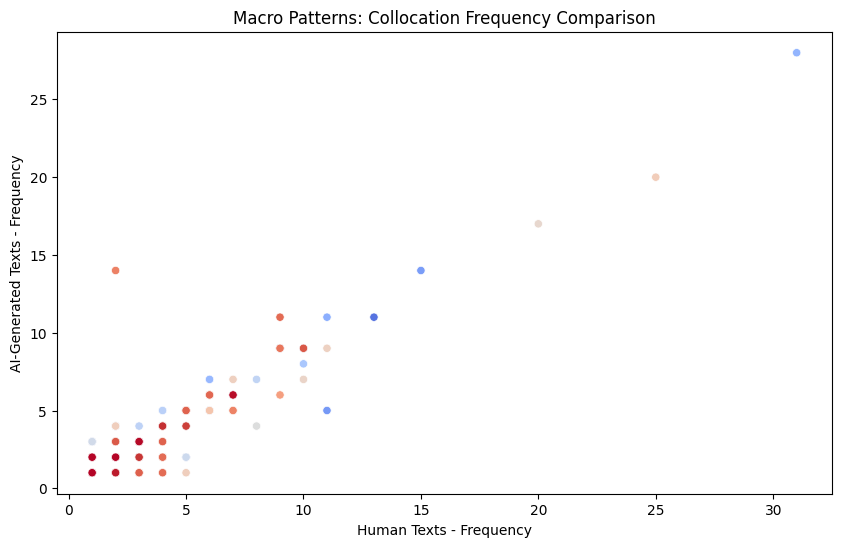

Context-Specific Collocations in Human Texts:
partisan politic
experience whole
aid curious
rfk jr.
pensioner big
temperature 400
ony k-12
amazon series
trump argue
shape outcome

Context-Specific Collocations in AI-Generated Texts:
mystery behind
9 new
experience microsoft
yogurt virus
week cause
lose humane
mind senedd
monitor serial
... charles
california expand
Context of 'partisan politic' in text:
  - Michelle Obama remains one of the most popular figures in the Democratic Party, despite her aversion for partisan politics.

Context of 'partisan politic' in text:

Context of 'mystery behind' in text:

Context of 'mystery behind' in text:
  - What is the mystery behind the bizarre psychological phenomenon?



In [ ]:
import seaborn as sns
import string
import spacy
from collections import Counter
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
import matplotlib.pyplot as plt
import pandas as pd

# Load the stopwords
stop_words = set(stopwords.words('english'))

# Load SpaCy language model
nlp = spacy.load('en_core_web_sm')

# Preprocess text: Tokenization, normalization, lemmatization, and remove stopwords
def preprocess_text(text):
    # Tokenize and preprocess with SpaCy
    doc = nlp(text)

    # Convert to lowercase, remove punctuation, and remove stopwords
    tokens = [token.lemma_.lower() for token in doc if token.text not in string.punctuation]
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

# Apply preprocessing to both columns
df['processed_description'] = df['description'].apply(preprocess_text)
df['processed_paraphrased_description'] = df['Paraphrased Description'].apply(preprocess_text)

# Function to extract bigrams and their frequency counts
def extract_bigram_frequencies(tokens_list, freq_threshold=1):
    all_tokens = [token for tokens in tokens_list for token in tokens]
    bigram_finder = BigramCollocationFinder.from_words(all_tokens)
    bigram_finder.apply_freq_filter(freq_threshold)
    bigram_freq = bigram_finder.ngram_fd.items()
    return sorted(bigram_freq, key=lambda x: -x[1])

# Extract bigram frequencies for both human-written and AI-generated texts
freq_description = extract_bigram_frequencies(df['processed_description'])
freq_paraphrased = extract_bigram_frequencies(df['processed_paraphrased_description'])

# Convert the frequency results into Counter objects
freq_description_counter = Counter(dict(freq_description))
freq_paraphrased_counter = Counter(dict(freq_paraphrased))

### Macro Patterns: Scatterplot Analysis

# Prepare data for scatterplot: Compare frequency of common collocations
def prepare_scatterplot_data(freq_human, freq_ai):
    common_collocations = set(freq_human.keys()).intersection(set(freq_ai.keys()))
    data = {
        'Collocation': [],
        'Human Frequency': [],
        'AI Frequency': []
    }
    for collocation in common_collocations:
        data['Collocation'].append(" ".join(collocation))
        data['Human Frequency'].append(freq_human[collocation])
        data['AI Frequency'].append(freq_ai[collocation])
    return pd.DataFrame(data)

# Create the scatterplot for macro patterns
def plot_macro_patterns(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Human Frequency', y='AI Frequency', data=data, hue='Collocation', palette='coolwarm', legend=False)
    plt.title("Macro Patterns: Collocation Frequency Comparison")
    plt.xlabel("Human Texts - Frequency")
    plt.ylabel("AI-Generated Texts - Frequency")
    plt.show()

# Prepare data and plot scatterplot
scatterplot_data = prepare_scatterplot_data(freq_description_counter, freq_paraphrased_counter)
plot_macro_patterns(scatterplot_data)

### Micro Patterns: Identifying Context-Specific Collocations

# Identify context-specific collocations (unique to each text type)
def find_context_specific_collocations(freq_human, freq_ai):
    unique_human = set(freq_human.keys()).difference(set(freq_ai.keys()))
    unique_ai = set(freq_ai.keys()).difference(set(freq_human.keys()))
    return unique_human, unique_ai

# Extract and print context-specific collocations
unique_human_collocations, unique_ai_collocations = find_context_specific_collocations(freq_description_counter, freq_paraphrased_counter)

print("Context-Specific Collocations in Human Texts:")
for collocation in list(unique_human_collocations)[:10]:
    print(" ".join(collocation))

print("\nContext-Specific Collocations in AI-Generated Texts:")
for collocation in list(unique_ai_collocations)[:10]:
    print(" ".join(collocation))

### Contextual Analysis: Comparing Contextual Usage of Collocations

# Compare contextual usage of collocations by looking at specific collocations in context
def compare_contextual_usage(text_column, collocation_list):
    for collocation in collocation_list:
        collocation_str = " ".join(collocation)
        print(f"Context of '{collocation_str}' in text:")
        for text in text_column:
            if collocation_str in text.lower():
                print(f"  - {text}")
        print()

# Compare usage of a specific collocation in human-written vs AI texts
specific_collocation = list(unique_human_collocations)[0]  # Use one unique human collocation
compare_contextual_usage(df['description'], [specific_collocation])
compare_contextual_usage(df['Paraphrased Description'], [specific_collocation])

# Repeat the same for a unique AI-generated collocation
specific_ai_collocation = list(unique_ai_collocations)[0]
compare_contextual_usage(df['description'], [specific_ai_collocation])
compare_contextual_usage(df['Paraphrased Description'], [specific_ai_collocation])


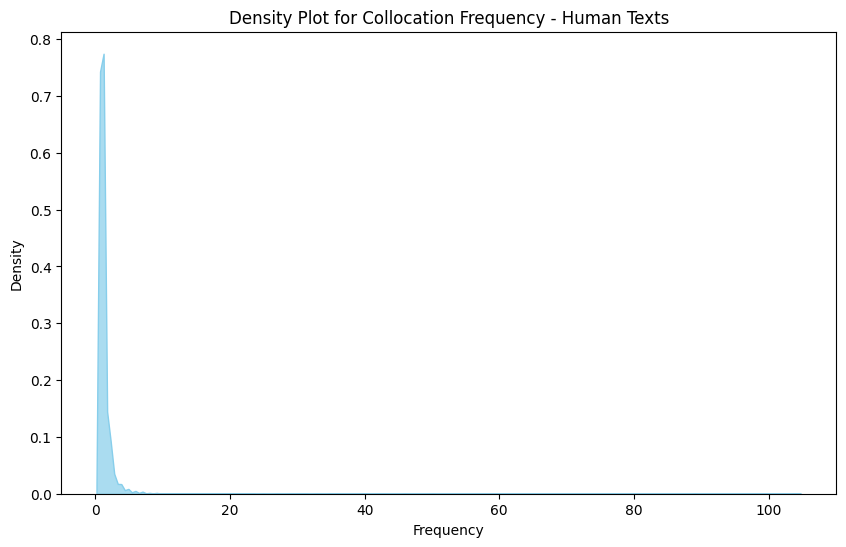

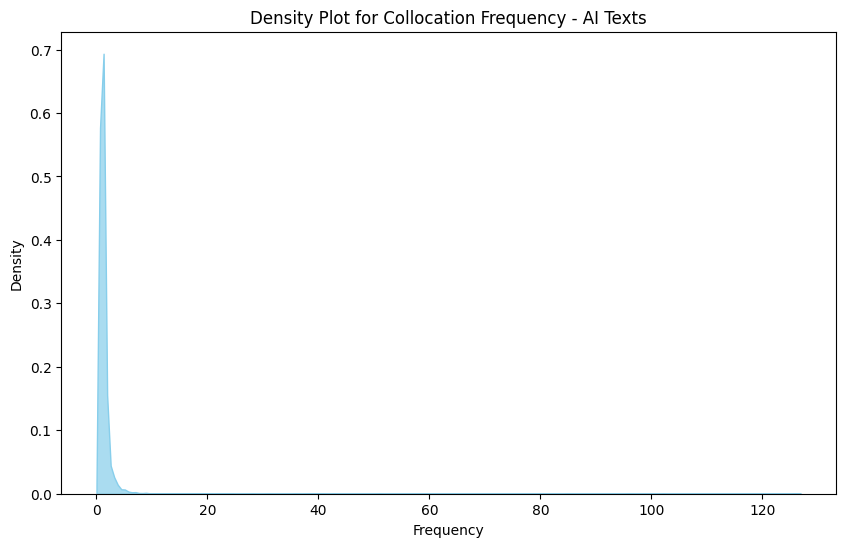

In [ ]:
def plot_density_distribution(freq_counter, title):
    frequencies = list(freq_counter.values())
    plt.figure(figsize=(10, 6))
    sns.kdeplot(frequencies, fill=True, color="skyblue", alpha=0.7)
    plt.title(f"Density Plot for Collocation Frequency - {title}")
    plt.xlabel("Frequency")
    plt.ylabel("Density")
    plt.show()

# Plot density distribution for both datasets
plot_density_distribution(freq_description_counter, "Human Texts")
plot_density_distribution(freq_paraphrased_counter, "AI Texts")
